# **Studio dei redditi in Danimarca**

Sanchini Federico -
24/01/2024


In questo notebook è proposto uno studio sull'andamento dei redditi dei cittadini danesi, divisi in 3 gruppi fondamentali: famiglie, coppie e singles.

Verranno analizzati i cambiamenti avvenuti fra il 2014 ed il 2023, in particolare le variazioni (in percentuale) dei gruppi appartenenti ad un certo intervallo di reddito. A questo sarà accompagnato uno studio sull'andamento del **coefficiente di Gini**, per verificare se questi cambiamenti hanno 
portato ad una diminuzione della disuguaglianza economica.

Infine viene analizzata la **distribuzione geografica della ricchezza**, evidenziando la concentrazioni di gruppi particolarmente benestanti in località specifiche della Danimarca, in particolare si analizza la *Capital Region*. 

In [12]:
import pandas as pd

# Caricare il file CSV
file_path = 'family_income_dk2014-2023.csv'
df = pd.read_csv(file_path)

df.head()

,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Families in the group (Number),Total,"Families, total",All Denmark,2882246,2913147,2943524,2973031,2995484,3014327,3042302,3066273,3087026,3118634
1,Families in the group (Number),Total,"Families, total",Copenhagen,343970,349454,354843,360914,366895,371417,377095,381659,384503,388467
2,Families in the group (Number),Total,"Families, total",Frederiksberg,60036,60418,60653,60256,59846,59789,59842,60114,60472,60701
3,Families in the group (Number),Total,"Families, total",Dragør,6464,6501,6583,6628,6638,6746,6776,6791,6722,6742
4,Families in the group (Number),Total,"Families, total",Tårnby,20869,21050,21193,21261,21241,21235,21137,21191,21230,21660


In [13]:
# Eliminare la prima colonna
df = df.drop(columns=['c1'])

# Rinominare le colonne
df = df.rename(columns={'c2': 'income', 'c3': 'group'})

# Sostituire i valori nella colonna 'group'
df['group'] = df['group'].replace({
    'Families, total': 'Families',
    'Couples, total': 'Couples',
    'Single people, total': 'Single'
})

# Sostituire i valori nella colonna 'group'
df['income'] = df['income'].replace({
    'Less than 200,000 DKK': '<200k',
    '200,000 - 299,999 DKK': '200k-299k',
    '300,000 - 399,999 DKK': '300k-399k',
    '400,000 - 499,999 DKK': '400k-499k',
    '500,000 - 599,999 DKK': '500k-599k',
    '600,000 - 699,999 DKK': '600k-699k',
    '700,000 - 799,000 DKK': '700k-799k',
    '800,000 - 899,000 DKK': '800k-899k',
    '900,000 - 999,000 DKK': '900k-999k',
    '1 million DKK, and more': '>1M',
})

output_file_path = 'family_income_modified.csv'  # Specifica il percorso e il nome del file
df.to_csv(output_file_path, index=False)  # `index=False` per non salvare l'indice come colonna

print(df.dtypes)


income    object
group     object
place     object
2014      object
2015      object
2016      object
2017      object
2018      object
2019      object
2020      object
2021      object
2022      object
2023      object
dtype: object


In [14]:
# Lista delle colonne da convertire
columns_to_convert = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Conversione delle colonne a numerico, sostituendo i valori non validi con NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Variazioni fra i vari intervalli di reddito

Per ogni gruppo presente nel file originario (Famiglie, coppie e singles) vengono calcolate le percentuali di entità in un determinato intervallo rispetto al totale. Ciò viene fatto per due anni differenti, 2014 e 2023, cioè il primo e l'ultimo anno a disposizione.
Calcolando la differenza fra le percentuali di ogni intervallo si può notare la "migrazione" di certe entità verso altri intervalli e carpire l'andamento generale. 

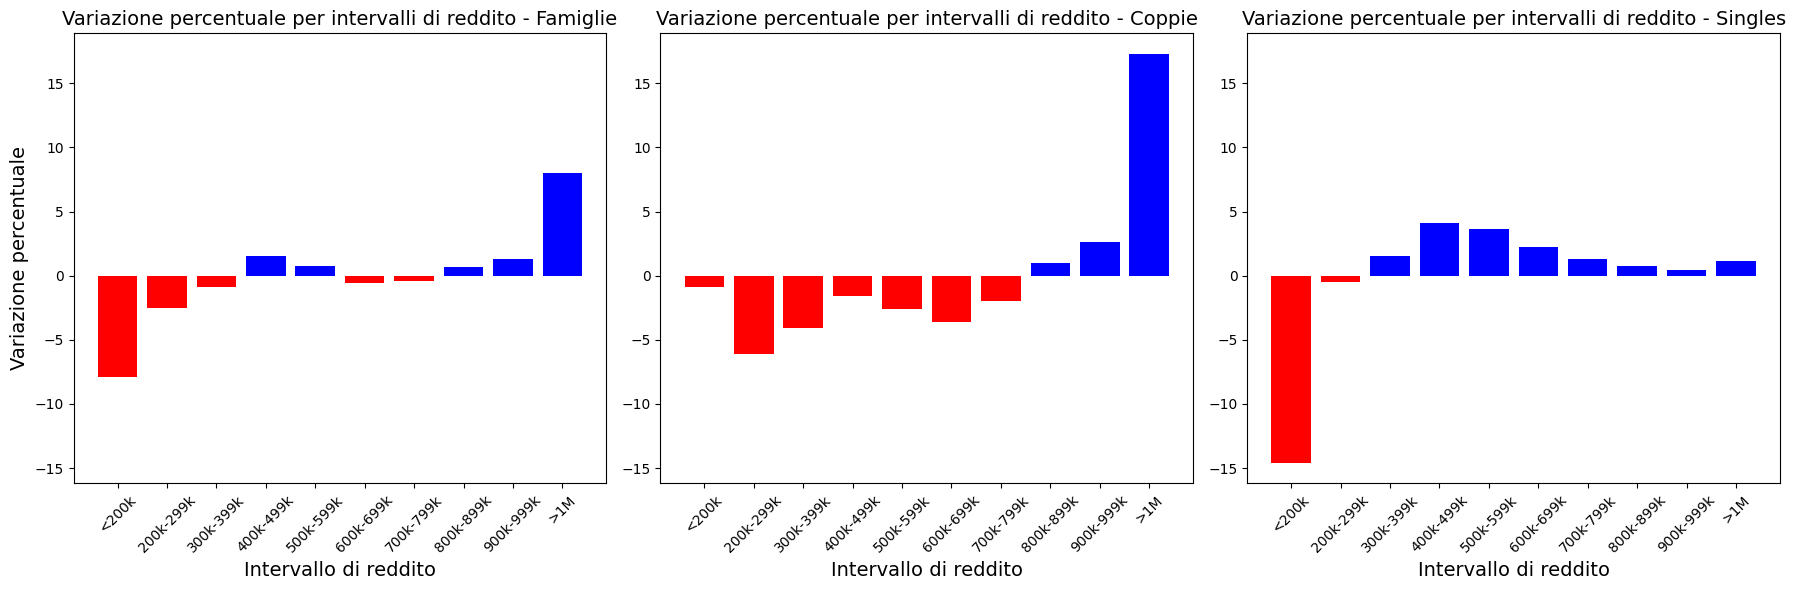

In [15]:
# Filtro per selezionare solo le righe con 'All Denmark' nella colonna 'place'
df_all_denmark = df[df['place'] == 'All Denmark']

# Filtriamo i dati per ogni gruppo
families_data = df_all_denmark[df_all_denmark['group'] == 'Families'].copy()  # Aggiungi .copy()
couples_data = df_all_denmark[df_all_denmark['group'] == 'Couples'].copy()  # Aggiungi .copy()
singles_data = df_all_denmark[df_all_denmark['group'] == 'Single'].copy()  # Aggiungi .copy()

# Calcolo delle variazioni percentuali
families_data.loc[:, "% 2014"] = (families_data["2014"] / families_data.loc[families_data['income'] == 'Total', '2014'].values[0]) * 100
families_data.loc[:, "% 2023"] = (families_data["2023"] / families_data.loc[families_data['income'] == 'Total', '2023'].values[0]) * 100
families_data.loc[:, "% variation"] = families_data["% 2023"] - families_data["% 2014"]

couples_data.loc[:, "% 2014"] = (couples_data["2014"] / couples_data.loc[couples_data['income'] == 'Total', '2014'].values[0]) * 100
couples_data.loc[:, "% 2023"] = (couples_data["2023"] / couples_data.loc[couples_data['income'] == 'Total', '2023'].values[0]) * 100
couples_data.loc[:, "% variation"] = couples_data["% 2023"] - couples_data["% 2014"]

singles_data.loc[:, "% 2014"] = (singles_data["2014"] / singles_data.loc[singles_data['income'] == 'Total', '2014'].values[0]) * 100
singles_data.loc[:, "% 2023"] = (singles_data["2023"] / singles_data.loc[singles_data['income'] == 'Total', '2023'].values[0]) * 100
singles_data.loc[:, "% variation"] = singles_data["% 2023"] - singles_data["% 2014"]

families_data = families_data[families_data['income'] != 'Total']
couples_data = couples_data[couples_data['income'] != 'Total']
singles_data = singles_data[singles_data['income'] != 'Total']


output_file_path = 'family.csv'  # Specifica il percorso e il nome del file
families_data.to_csv(output_file_path, index=False)  # `index=False` per non salvare l'indice come colonna

import matplotlib.pyplot as plt

# Crea la figura con 3 subplot (1 fila, 3 colonne), condividendo l'asse y
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dimensioni personalizzate per i caratteri
title_fontsize = 14
label_fontsize = 14
tick_fontsize = 10

# Filtra e crea l'istogramma per il gruppo Families
colors_families = ['blue' if x >= 0 else 'red' for x in families_data['% variation']]
axes[0].bar(families_data['income'], families_data['% variation'], color=colors_families)
axes[0].set_xlabel('Intervallo di reddito', fontsize=label_fontsize)
axes[0].set_ylabel('Variazione percentuale', fontsize=label_fontsize)
axes[0].set_title('Variazione percentuale per intervalli di reddito - Famiglie', fontsize=title_fontsize)
axes[0].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# Filtra e crea l'istogramma per il gruppo Couples
colors_couples = ['blue' if x >= 0 else 'red' for x in couples_data['% variation']]
axes[1].bar(couples_data['income'], couples_data['% variation'], color=colors_couples)
axes[1].set_xlabel('Intervallo di reddito', fontsize=label_fontsize)
axes[1].set_title('Variazione percentuale per intervalli di reddito - Coppie', fontsize=title_fontsize)
axes[1].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# Filtra e crea l'istogramma per il gruppo Singles
colors_singles = ['blue' if x >= 0 else 'red' for x in singles_data['% variation']]
axes[2].bar(singles_data['income'], singles_data['% variation'], color=colors_singles)
axes[2].set_xlabel('Intervallo di reddito', fontsize=label_fontsize)
axes[2].set_title('Variazione percentuale per intervalli di reddito - Singles', fontsize=title_fontsize)
axes[2].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
axes[2].tick_params(axis='y', labelsize=tick_fontsize)

# Aggiunge i tickers per ogni asse y
for ax in axes:
    ax.yaxis.set_tick_params(which='both', labelleft=True)

# Ottimizza il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra la figura con i 3 grafici
plt.show()



La scelta di considerare la differenza fra le percentuali di ogni intervallo e non la variazione percentuale per ogni intervallo è obbligata dal fatto che il totale delle dichiarazioni è aumentato dal 2014 al 2023, il che comporta un aumento nascosto della variazione percentuale.
 
Per ogni gruppo considerato (famiglie, coppie e singles) la somma delle variazioni percentuali per tutti gli intervalli di reddito è 0.
Ciò rappresenta matematicamente la "migrazione" di entità facenti parte di un certo gruppo da un intervallo di reddito ad un altro, normalizzata per il totale delle entità.

In generale, come visibile dai 3 grafici, le variazioni percentuali degli intervalli di reddito più bassi sono negative, evidenziando una diminuzione relativa delle entità meno abbienti. Di conseguenza si hanno variazioni percentuali positive per gli intervalli di reddito più alti, con il conseguente aumento relativo di entità appartenti a fasce benestanti.

# Coefficiente di Gini

L'aumento di entità appartenenti a fasce di reddito più alte e la dminuzione per le fasce più basse fa pensare ad un processo di ridistribuzione economica ed un conseguente abbattimento della disuguaglianza di reddito fra i cittadini danesi.

Per verificare che effettivamente si stia andando in quella direzione si può calcolare, anno per anno, il **coeffiiciente di Gini**.
Il coefficiente di Gini, introdotto dallo statistico italiano Corrado Gini, è una misura della diseguaglianza di una distribuzione. È un numero compreso tra 0 ed 1; valori bassi del coefficiente indicano una distribuzione abbastanza omogenea, con il valore 0 che corrisponde alla pura equidistribuzione, ad esempio la situazione in cui tutti percepiscono esattamente lo stesso reddito; valori alti del coefficiente indicano una distribuzione più diseguale, con il valore 1 che corrisponde alla massima concentrazione, ovvero la situazione dove una persona percepisca tutto il reddito del paese mentre tutti gli altri hanno un reddito nullo. 

La definizione matematica del coefficiente di Gini si basa sulla curva di Lorenz della distribuzione ed è legata all'area compresa fra la linea di perfetta uguaglianza e la curva di Lorenz. Il coefficiente di Gini è definito come il rapporto fra l'area compresa tra la linea di perfetta uguaglianza e la curva di Lorenz $A$ e l'area totale sotto la linea di perfetta uguaglianza $A + B$, ossia $$G = A / ( A + B )$$.


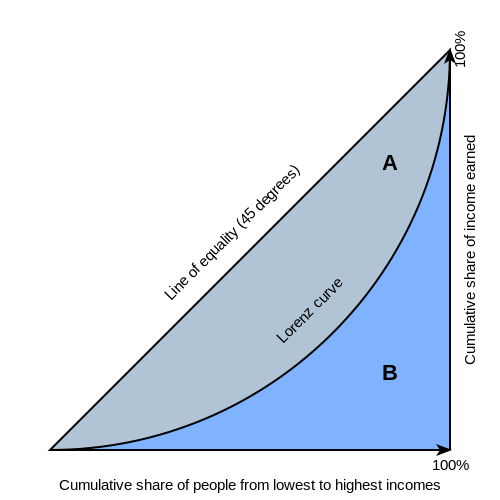

In [16]:
# Carica e visualizza l'immagine PNG
from IPython.display import display, Image
display(Image(filename='Gini_definizione.png', width=600))

In alcuni casi, l'intera curva di Lorenz potrebbe non essere conosciuta, e si potrebbero avere solo i valori in alcuni intervalli. In tal caso, il coefficiente di Gini può essere approssimato utilizzando diverse tecniche di interpolazione per stimare i valori mancanti della curva di Lorenz. 

Se i punti noti sulla curva di Lorenz sono dati come $(X_k, Y_k)$, dove i valori di $X_k$ sono indicizzati in ordine crescente (ovvero $X_{k-1} < X_k$), con:

- $X_k$ rappresenta la proporzione cumulativa della variabile della popolazione, per $k = 0, \dots, n $ con $X_0 = 0$ e $X_n = 1$.
- $Y_k$ rappresenta la proporzione cumulativa della variabile di reddito, per $k = 0, \dots, n $ con $Y_0 = 0$ e  $Y_n = 1$.

Se la curva di Lorenz è approssimata in ciascun intervallo come una linea tra due punti consecutivi, l'area $B$ può essere approssimata usando dei trapezi. Pertanto, il coefficiente di Gini può essere approssimato come segue: 
$$
G = 1 - \sum_{k=1}^{n} (X_k - X_{k-1})(Y_k + Y_{k-1})
$$

Questa è l'approssimazione del coefficiente di Gini, che considera i trapezi formati tra i punti noti della curva di Lorenz.

C:\Users\feder\AppData\Local\Temp\ipykernel_13296\1056447736.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.loc[:, f_rel_col] = df_group[str(year)] / col_totals
C:\Users\feder\AppData\Local\Temp\ipykernel_13296\1056447736.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.loc[:, f_rel_col] = df_group[str(year)] / col_totals
C:\Users\feder\AppData\Local\Temp\ipykernel_13296\1056447736.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


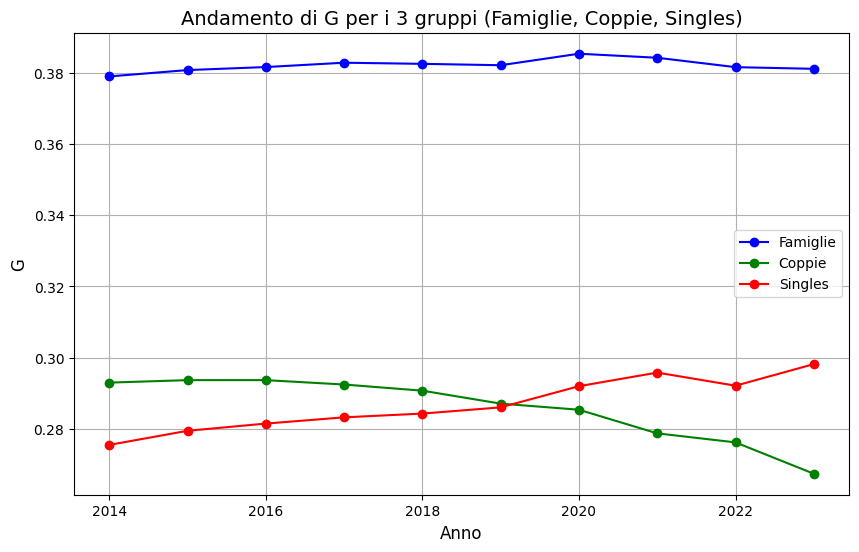

In [17]:
import matplotlib.pyplot as plt

# Filtrare per il place "All Denmark"
df_all_denmark = df[df['place'] == 'All Denmark']

# Creare i DataFrame per i tre gruppi
df_families = df_all_denmark[df_all_denmark['group'] == 'Families']
df_couples = df_all_denmark[df_all_denmark['group'] == 'Couples']
df_single = df_all_denmark[df_all_denmark['group'] == 'Single']

# Mappatura dei valori di 'income' con i corrispondenti valori numerici
income_mapping = {
    '<200k': 150000.0,
    '200k-299k': 250000.0,
    '300k-399k': 350000.0,
    '400k-499k': 450000.0,
    '500k-599k': 550000.0,
    '600k-699k': 650000.0,
    '700k-799k': 750000.0,
    '800k-899k': 850000.0,
    '900k-999k': 950000.0,
    '>1M': 1500000.0
}

# Sostituzione dei valori nella colonna 'income' usando .loc per evitare il SettingWithCopyWarning
df_families.loc[:, 'income'] = df_families['income'].replace(income_mapping)
df_couples.loc[:, 'income'] = df_couples['income'].replace(income_mapping)
df_single.loc[:, 'income'] = df_single['income'].replace(income_mapping)

# Funzione per calcolare il valore di G per un DataFrame
def calculate_G(df_group):
    # Filtra la riga con i totali
    totals = df_group[df_group['income'] == 'Total']

    # Loop su tutti gli anni dal 2014 al 2023
    for year in range(2014, 2024):
        col_totals = totals[str(year)].values[0]  # Valore totale per l'anno specifico
        f_rel_col = f"f_rel_{year}"  # Nome della nuova colonna
        # Calcola il rapporto e aggiungi la colonna usando .loc
        df_group.loc[:, f_rel_col] = df_group[str(year)] / col_totals

    # Resetta l'indice del DataFrame
    df_group = df_group.reset_index(drop=True)

    # Loop su tutti gli anni dal 2014 al 2023
    for year in range(2014, 2024):
        x_col = f"X_{year}"  # Nome della nuova colonna X
        f_rel_col = f"f_rel_{year}"  # Colonna f_rel per l'anno
        
        # Inizializza la colonna X con 0
        df_group.loc[:, x_col] = 0.0
        
        # Calcola il valore di X per ogni riga (escludendo la riga "Total")
        for i in range(1, len(df_group)):  # Parte dalla seconda riga
            df_group.at[i, x_col] = df_group.at[i, f_rel_col] + df_group.at[i - 1, x_col]

    # Loop su tutti gli anni dal 2014 al 2023
    for year in range(2014, 2024):
        reddito_totale_col = f"reddito_totale_{year}"  # Nome della nuova colonna
        
        # Inizializza la colonna del reddito totale con 0
        df_group.loc[:, reddito_totale_col] = 0.0
        
        # Calcola il reddito totale per ogni riga, escludendo "Total"
        for i in range(1, len(df_group)):  # Parte dalla seconda riga
            df_group.at[i, reddito_totale_col] = df_group.at[i, str(year)] * df_group.at[i, 'income']

    # Calcola la somma dei redditi totali per ogni anno (dal 2014 al 2023)
    redditi_totali_per_anno = {}

    for year in range(2014, 2024):
        reddito_totale_col = f"reddito_totale_{year}"  # Nome della colonna del reddito totale
        redditi_totali_per_anno[year] = df_group[reddito_totale_col].sum()

    # Aggiungi le colonne 'f_rel_red_20**' per ogni anno dal 2014 al 2023
    for year in range(2014, 2024):
        # Nome della colonna 'reddito_totale_20**'
        reddito_totale_col = f"reddito_totale_{year}"
        
        # Nome della nuova colonna 'f_rel_red_20**'
        f_rel_red_col = f"f_rel_red_{year}"
        
        # Calcola i valori per ogni riga
        df_group.loc[:, f_rel_red_col] = 0  # Imposta a 0 inizialmente per tutte le righe
        for i in range(len(df_group)):
            if df_group.loc[i, 'income'] != 'Total':  # Se non è la riga 'Total'
                df_group.loc[i, f_rel_red_col] = df_group.loc[i, reddito_totale_col] / redditi_totali_per_anno[year]

    # Aggiungi le colonne 'Y_20**' per ogni anno dal 2014 al 2023
    for year in range(2014, 2024):
        # Nome della colonna 'f_rel_red_20**2'
        f_rel_red_col = f"f_rel_red_{year}"
        
        # Nome della nuova colonna 'Y_20**'
        y_col = f"Y_{year}"
        
        # Imposta il valore iniziale della colonna 'Y_20**' a 0
        df_group.loc[:, y_col] = 0
        
        # Calcola i valori per ogni riga
        for i in range(1, len(df_group)):  # Parte dalla seconda riga (indice 1)
            if df_group.loc[i, 'income'] != 'Total':  # Se non è la riga 'Total'
                df_group.loc[i, y_col] = df_group.loc[i, f_rel_red_col] + df_group.loc[i - 1, y_col]
                
    # Aggiungi la colonna 'G_20**' per ogni anno dal 2014 al 2023 e stampa i valori di G
    G_values = []
    for year in range(2014, 2024):
        # Nome delle colonne 'X_20**' e 'Y_20**'
        x_col = f"X_{year}"
        y_col = f"Y_{year}"
        
        # Calcola la somma per il calcolo di G
        sum_G = 0
        for i in range(1, len(df_group)):  # Parte dalla seconda riga (indice 1)
            X_diff = df_group.loc[i, x_col] - df_group.loc[i - 1, x_col]
            Y_sum = df_group.loc[i, y_col] + df_group.loc[i - 1, y_col]
            sum_G += X_diff * Y_sum
        
        # Calcola G per l'anno corrente
        G_value = 1 - sum_G
        
        # Aggiungi una nuova colonna 'G_20**' con il valore calcolato
        df_group.loc[:, f"G_{year}"] = G_value
        
        # Aggiungi il valore di G alla lista per il grafico
        G_values.append(G_value)
    
    return G_values

# Calcolare G per ogni gruppo
G_families = calculate_G(df_families)
G_couples = calculate_G(df_couples)
G_single = calculate_G(df_single)

# Creare il grafico per i 3 gruppi
plt.figure(figsize=(10, 6))

plt.plot(range(2014, 2024), G_families, marker='o', label='Famiglie', color='b')
plt.plot(range(2014, 2024), G_couples, marker='o', label='Coppie', color='g')
plt.plot(range(2014, 2024), G_single, marker='o', label='Singles', color='r')

# Aggiungi etichette e titolo
plt.title('Andamento di G per i 3 gruppi (Famiglie, Coppie, Singles)', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('G', fontsize=12)
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.show()


L'andamento del coefficiente di Gini per i 3 gruppi è diverso l'uno dall'altro.
Per le famiglie il coefficiente di Gini si attesta a 0.38 punti, senza particolari variazioni rispetto al 2014.
Per le coppie il coefficiente di Gini è diminuito di 0.02 punti circa nell'arco di 10 anni, al contrario i single è aumentato di 0.02 punti.

In generale si può affermare che il coefficiente di Gini è rimasto stabile (tra 0.28 e 0.38 a seconda del gruppo considerato), con delle variazioni limitate.

E' importante sottolineare che il calcolo è particolarmente sensibile ai valori dei vari intervalli, e per ciò è fortemente influenzabile dai guess iniziali sulle fasce <200k e >1M. In questo caso il guess è stato di 150k e 1.5M.

# Distribuione geografica della ricchezza

Viene ora proposta l'analisi della distribuzione della ricchezza sul suolo danese. Può essere di interesse infatti visualizzare se ci sono regioni geografiche in cui la concentrazione di "milionari" è maggiore rispetto alla media del paese.

Storicamente la regione denominata *Capital Region*, la regione in cui risiede per l'appunto la capitale danese Copenhagen, ha sempre concentrato dei livelli di ricchezza mediamente più alti rispetto al resto della Danimarca. Si vuole dunque verificare che questa maggiore concentrazione di redditi più alti (consideriamo ad esempio redditi $>1M$) non sia solo un caso statistico.

Valutiamo dunque la percentuale di entità con reddito superiore ad un milione di corone danesi oer ogni città, dividiamo le città in due set: città appartenenti alla *Capital Region* e citta ex. *Capital Region*. Calcoliamo la percentuale media dei due set e verifichiamo se questi due set di valori appartengono alla medesima distribuzione.

Non volendo assumere che entrambi i set si distribuiscano in modo normale si deve escludere un semplice z-test ed il relativo *p-value* come indicatore per rifiutare l'ipotesi nulla. Si può invece, più in generale, verificare l'appartenenza dei due set a due distribuzioni differenti con un test di Kolmogorov-Smirnov. 

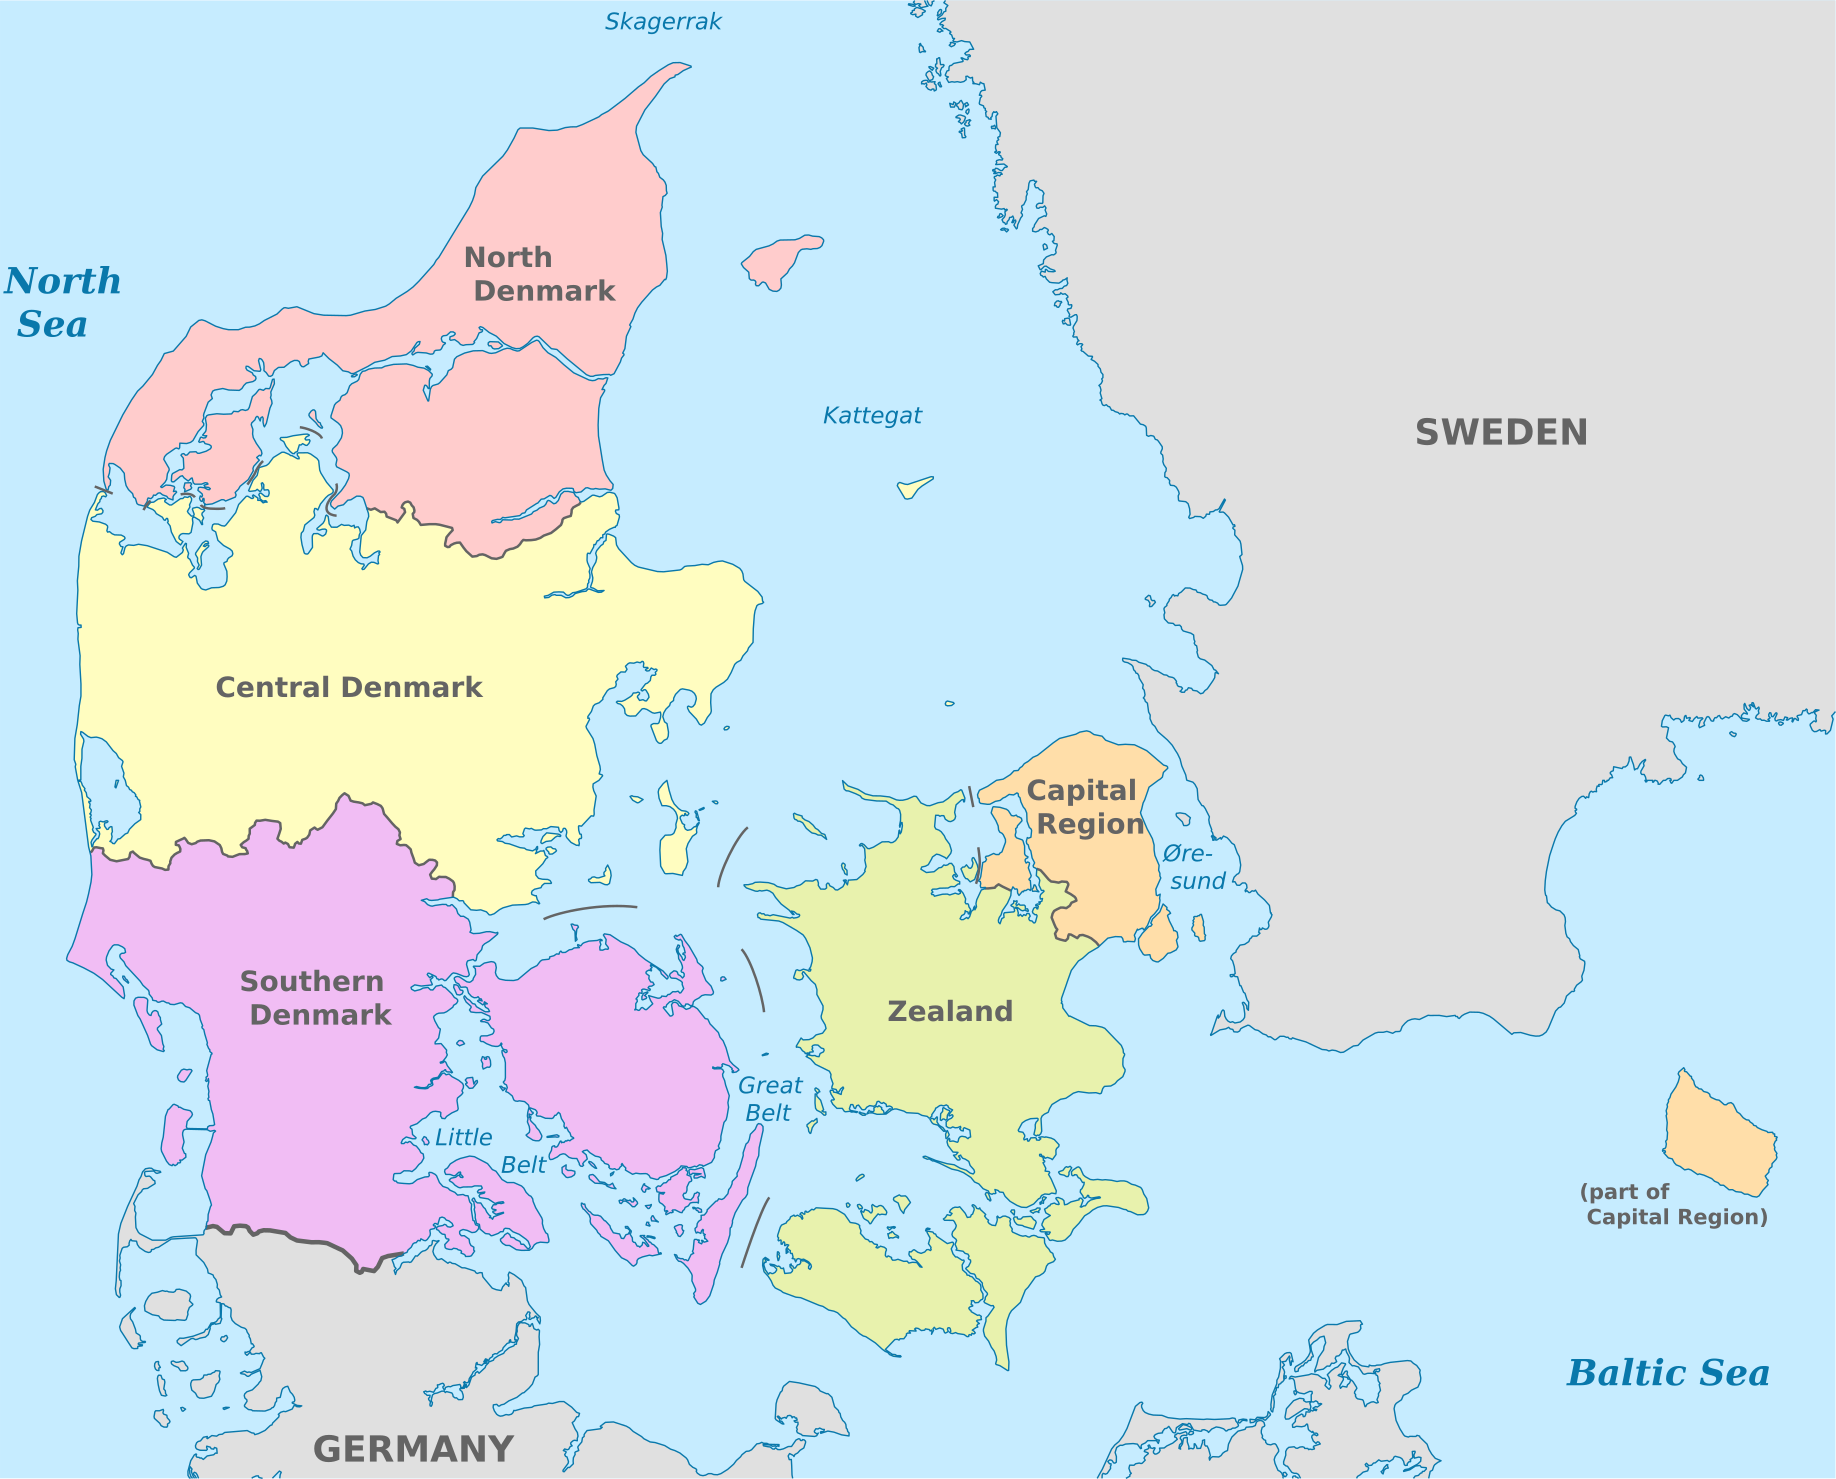

La Capital Region è evidenziata in questa immagine in arancione


In [18]:
# Carica e visualizza l'immagine PNG con dimensioni rimpicciolite
display(Image(filename='denmark_with_regions.png', width=600))  # Puoi modificare il valore di 'width' come desideri
print("La Capital Region è evidenziata in questa immagine in arancione")

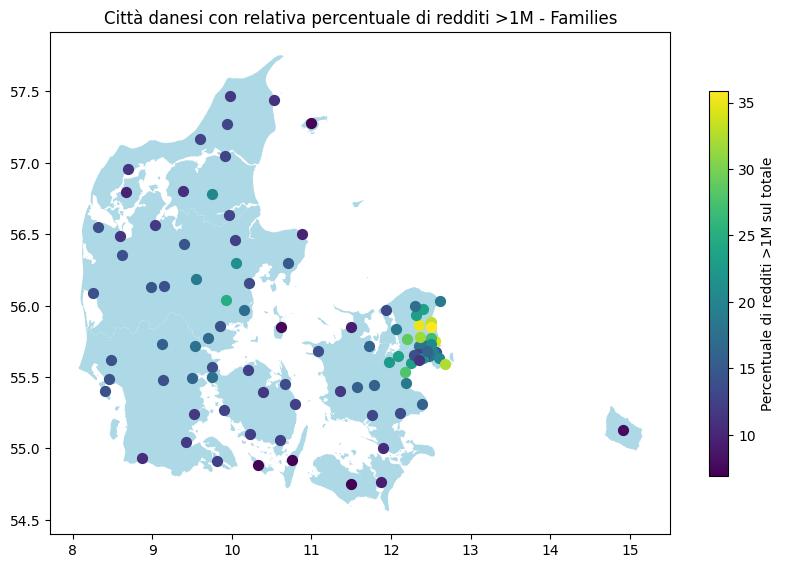

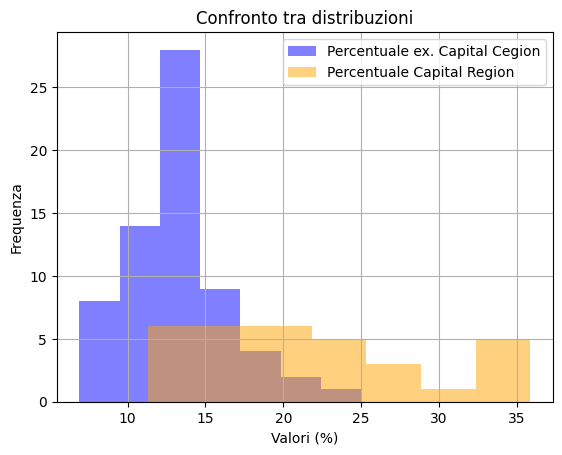

Percentuale media ex. Capital Region: 13.288
Percentuale media Capital Region: 21.863
Statistica KS: 0.661
Valore p: 0.000
Le distribuzioni sono significativamente diverse.


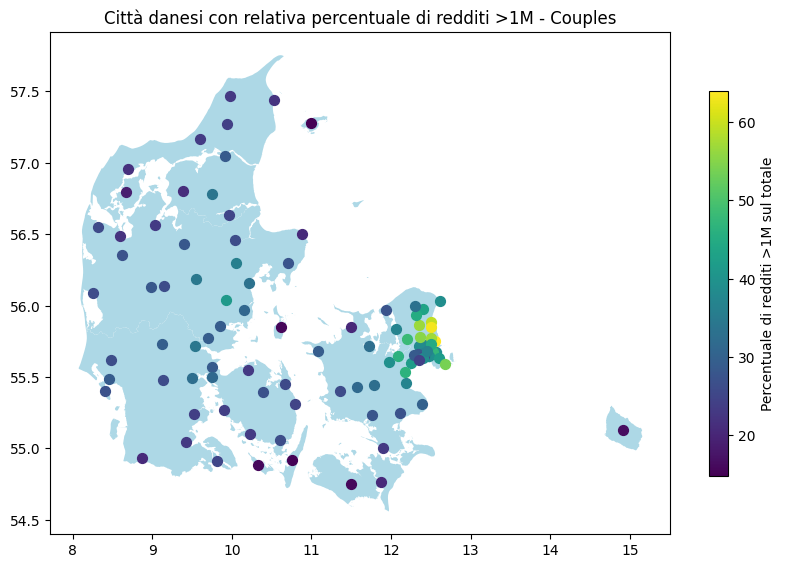

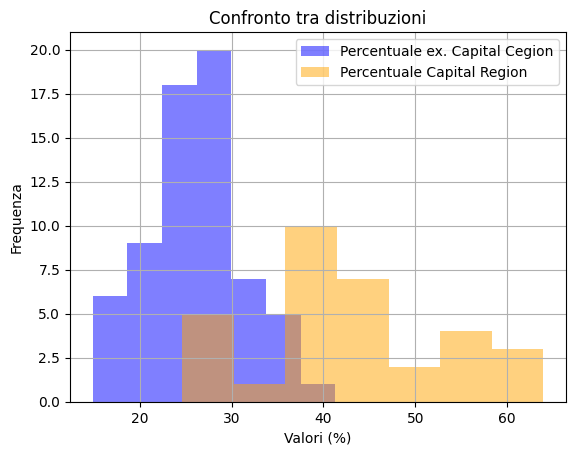

Percentuale media ex. Capital Region: 26.098
Percentuale media Capital Region: 42.649
Statistica KS: 0.782
Valore p: 0.000
Le distribuzioni sono significativamente diverse.


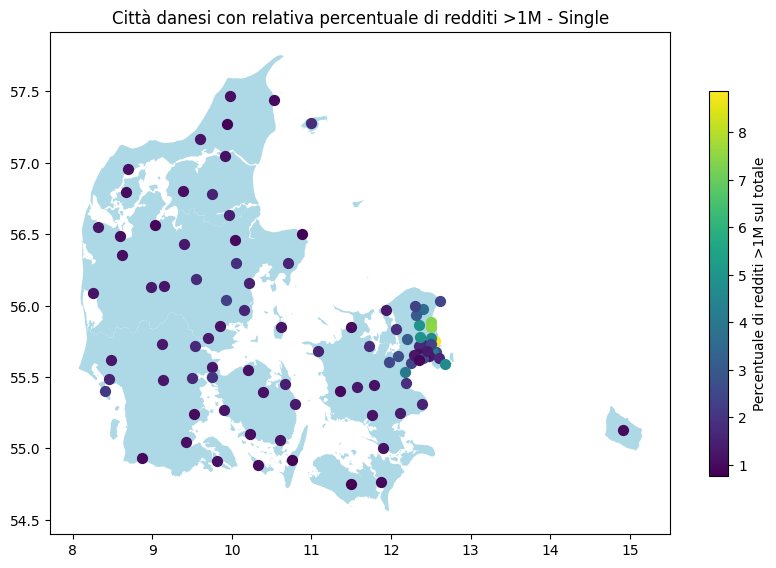

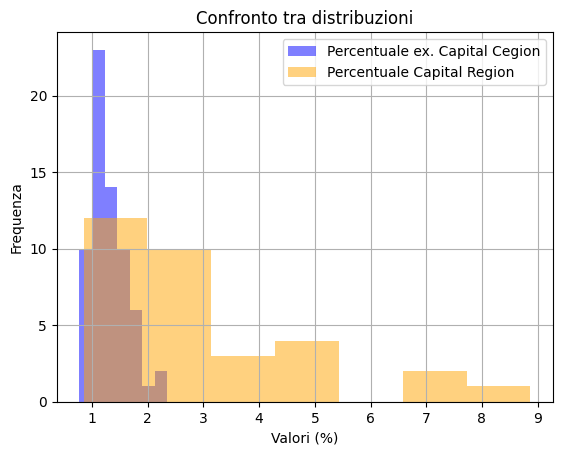

Percentuale media ex. Capital Region: 1.287
Percentuale media Capital Region: 3.032
Statistica KS: 0.610
Valore p: 0.000
Le distribuzioni sono significativamente diverse.


In [19]:
import geopandas as gpd
import json
from shapely.geometry import Point
from scipy.stats import ks_2samp

def process_group(group_name):
    # Creare un DataFrame filtrato per il gruppo specificato
    df_group = df[df['group'] == group_name]

    # Filtrare le righe relative a "1 million DKK, and more" e "Total"
    df_million = df_group[(df_group['income'] == '>1M')]
    df_total = df_group[(df_group['income'] == 'Total')]

    # Unire i due DataFrame sulla colonna 'place' per fare i calcoli
    df_merged = pd.merge(df_million[['place', '2023']], df_total[['place', '2023']], on='place', suffixes=('_million', '_total'))

    # Calcolo della percentuale e aggiunta di una nuova colonna
    df_merged["percentage"] = (df_merged["2023_million"] / df_merged["2023_total"]) * 100

    # Carica il file GeoJSON (mappa del tuo paese)
    geojson_file = 'mappa.geojson'
    gdf = gpd.read_file(geojson_file)

    # Carica il file delle città (dk.json)
    with open('dk.json', 'r') as f:
        cities_data = json.load(f)

    # Estrai la lista delle città presenti nel DataFrame
    cities_in_df = df_merged['place'].unique()

    # Ottieni i valori minimi e massimi delle percentuali
    min_percent = df_merged['percentage'].min()
    max_percent = df_merged['percentage'].max()

    # Crea una lista di punti da 'dk.json' solo per le città presenti nel DataFrame
    cities_points = []
    filtered_cities = []
    colors = []
    percentages = []  # Lista per memorizzare le percentuali

    # Lista per memorizzare le percentuali delle città con longitudine > 12
    percentages_capital_region = []

    for city in cities_data:
        if city['city'] in cities_in_df and city['lat'] and city['lng']:
            try:
                # Trova la percentuale associata alla città nel DataFrame
                city_data = df_merged[df_merged['place'] == city['city']].iloc[0]
                percent = city_data['percentage']
                
                # Normalizza la percentuale tra 0 e 1
                norm_percent = (percent - min_percent) / (max_percent - min_percent)
                
                # Determina il colore in base alla percentuale
                color = plt.cm.viridis(norm_percent)

                lat = float(city['lat'])
                lng = float(city['lng'])
                city_point = Point(lng, lat)
                cities_points.append(city_point)
                filtered_cities.append(city)
                colors.append(color)
                percentages.append(percent)  # Aggiungi la percentuale alla lista

                # Verifica se la longitudine (lng) è maggiore di 12 e latitudine (ltd) è maggiore di 55.5 e aggiungi la percentuale
                if lng > 11.8 and lat > 55.5:
                    percentages_capital_region.append(percent)
            except ValueError:
                print(f"Errore nella conversione delle coordinate per la città: {city['city']}")

    # Crea un GeoDataFrame per le città filtrate
    cities_gdf = gpd.GeoDataFrame(filtered_cities, geometry=cities_points)

    # Imposta il sistema di riferimento spaziale (CRS) della mappa
    cities_gdf.set_crs(gdf.crs, allow_override=True, inplace=True)

    # Graficare la mappa
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='lightblue')  # Mappa principale

    # Plot delle città con colori in base alla percentuale
    for point, color in zip(cities_gdf.geometry, colors):
        ax.scatter(point.x, point.y, color=color, s=50)

    # Aggiungere una barra dei colori (colorbar) per indicare la scala della percentuale
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min_percent, vmax=max_percent))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label="Percentuale di redditi >1M sul totale", shrink=0.5)

    plt.title(f'Città danesi con relativa percentuale di redditi >1M - {group_name}')
    plt.show()

    # Dati delle percentuali (sostituisci con le tue liste di percentuali)
    percentages_all = percentages  # Percentuali di tutte le città graficate
    percentages_capital_region = percentages_capital_region  # Percentuali delle città appartenenti alla Capital Region

    # Filtra percentages_all per escludere i valori presenti in percentages_capital_region
    percentages_all_filtered = [p for p in percentages_all if p not in percentages_capital_region]

    # Istogramma
    plt.hist(percentages_all_filtered, bins=7, alpha=0.5, label='Percentuale ex. Capital Cegion', color='blue')
    plt.hist(percentages_capital_region, bins=7, alpha=0.5, label='Percentuale Capital Region', color='orange')

    # Impostazioni del grafico
    plt.xlabel('Valori (%)')
    plt.ylabel('Frequenza')
    plt.title('Confronto tra distribuzioni')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Mostra il grafico
    plt.show()

    # Esegui il test KS
    ks_stat, p_value = ks_2samp(percentages_all_filtered, percentages_capital_region)
    print(f"Percentuale media ex. Capital Region: {sum(percentages_all_filtered) / len(percentages_all_filtered):.3f}")
    print(f"Percentuale media Capital Region: {sum(percentages_capital_region) / len(percentages_capital_region):.3f}")

    # Stampa i risultati
    print(f"Statistica KS: {ks_stat:.3f}")
    print(f"Valore p: {p_value:.3f}")

    # Determina se la differenza è statisticamente significativa
    alpha = 0.05  # Livello di significatività (5%)

    if p_value < alpha:
        print("Le distribuzioni sono significativamente diverse.")
    else:
        print("Non ci sono evidenze sufficienti per affermare che le distribuzioni siano diverse.")

# Esegui il processo per Families, Couples e Single
for group in ['Families', 'Couples', 'Single']:
    process_group(group)


Per tutti e 3 i gruppi si può notare qualitativamente come le medie delle percentuali differiscano in modo sostanziale.

Il test KS afferma che le distribuzioni sono significativamente diverse, ciò significa che il livello di ricchezza della Danimarca e della *Capital Region* sono descritte in maniera differente. SI conclude quindi che la concentrazione media di entità milionare nella *Capital Region* è significativamente diversa rispetto alla media del resto della Danimarca.